# Cerebral Stroke Analysis and Prediction
### **Module 1:** Preliminary Exploratory Data Analysis
---

<br>
<strong>Group Members:</strong> Ayesha Naime (356760), Fatima Hussain (350328)
<br><br>
<strong>Context:</strong> A stroke, also known as a cerebrovascular accident or CVA is when part of the brain loses its blood supply and the part of the body that the blood-deprived brain cells control stops working. This loss of blood supply can be ischemic because of lack of blood flow, or hemorrhagic because of bleeding into brain tissue. A stroke is a medical emergency because strokes can lead to death or permanent disability. There are opportunities to treat ischemic strokes but that treatment needs to be started in the first few hours after the signs of a stroke begin.
<br><br>
<strong>Content:</strong> The cerebral Stroke dataset consists of 12 features including the target column which is imbalanced.
<br><br>
<strong>Objective:</strong> conduct a Preliminary Exploratory Data Analysis (EDA) on the cerebral stroke dataset to gain valuable insights into the characteristics of the data, identify patterns, and uncover potential relationships between variables. This initial analysis will lay the foundation for further investigations, guiding us in making informed decisions for subsequent stages of data processing and mining.
<br><br>
<strong>Dataset:</strong> <a href="https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/data" >https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/data</a>


## Importing Data and Libraries
---

In [ ]:
!pip install associations
!pip install imbalanced-learn

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d shashwatwork/cerebral-stroke-predictionimbalaced-dataset

  0% 0.00/560k [00:00<?, ?B/s]
100% 560k/560k [00:00<00:00, 52.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('cerebral-stroke-predictionimbalaced-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# imports
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# load dataset
df = pd.read_csv('dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In the dataset, stroke is the target variable and rest of the features are predictors.


## Data Insights
---

In [ ]:
df.shape

(43400, 12)

In [ ]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
categorical_features = []
binary_features = []

for f in df.columns:
  if f!='id':
    if df[f].dtype!='float':
      unique = df[f].unique()
      print(f,": ",unique)
      categorical_features.append(f)
      if len(df[f].unique())==2:
        binary_features.append(f)

print("Categorical: ",categorical_features)
print("Binary: ", binary_features)

gender :  ['Male' 'Female' 'Other']
hypertension :  [0 1]
heart_disease :  [0 1]
ever_married :  ['No' 'Yes']
work_type :  ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type :  ['Rural' 'Urban']
smoking_status :  [nan 'never smoked' 'formerly smoked' 'smokes']
stroke :  [0 1]
Categorical:  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
Binary:  ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']


In [ ]:
categorical_features.remove("stroke")
binary_features.remove("stroke")

In [ ]:
# null values count
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

---
From the above information, the dataset has:
- object, integer and float values
- missing or null values in bmi and smoking_status columns

<br>
<strong>Numeric Features:</strong> id, age, avg_glucose_level, bmi
<br>
<strong>Categorical Features:</strong> gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status, stroke


---

## 1. Univariate Statistics
---

### Numeric Variables

In [ ]:
# statistical description of numeric attributes
numeric_features = ["age", "avg_glucose_level", "bmi"]
df[numeric_features].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


Key Observations:
- Mean and median values are similar for age and bmi columns indicating distributions close to normal.
- For the avg_glucose_level column the median is less than the mean indicating a positively skewed distribution.
- There is a notably large difference between 75th %tile and max values of the avg_glucose_level and bmi features suggesting outliers.


In [ ]:
# color scheme for the graphs
colors = ["#c7e580", "#9485ba", "#f0a29a", "#dd6f64", "#bdb4d5"]

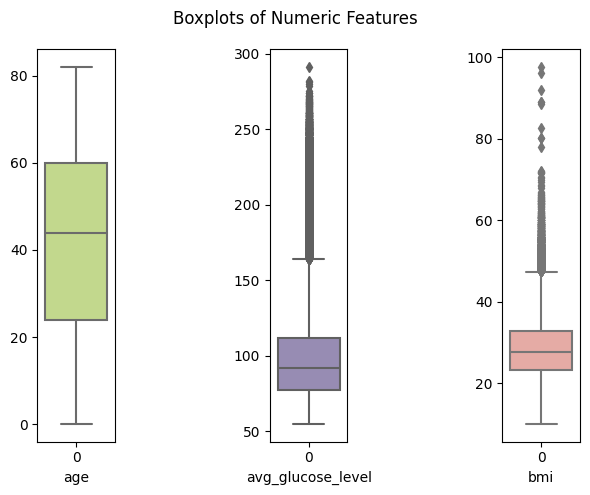

In [ ]:
# box plots for outliers
no_of_cols = 3
no_of_rows = math.ceil(len(numeric_features) / no_of_cols)

fig, axes = plt.subplots(no_of_rows,
                         no_of_cols,
                         figsize=(2*no_of_cols, 5*no_of_rows))
plt.suptitle('Boxplots of Numeric Features')

for i, col in enumerate(numeric_features):
  sns.set_style('whitegrid')
  sns.boxplot(df[col],
              color=colors[i],
              orient="v",
              ax=axes[i])
  axes[i].set_xlabel(col)
  plt.tight_layout()

plt.subplots_adjust(wspace=2)

Observations: Both the average glucose level and BMI exhibit notable presence of outliers. Conducting an outlier analysis will provide insights into the reasons behind their occurrence and appropriate measures can then be taken for addressing them.

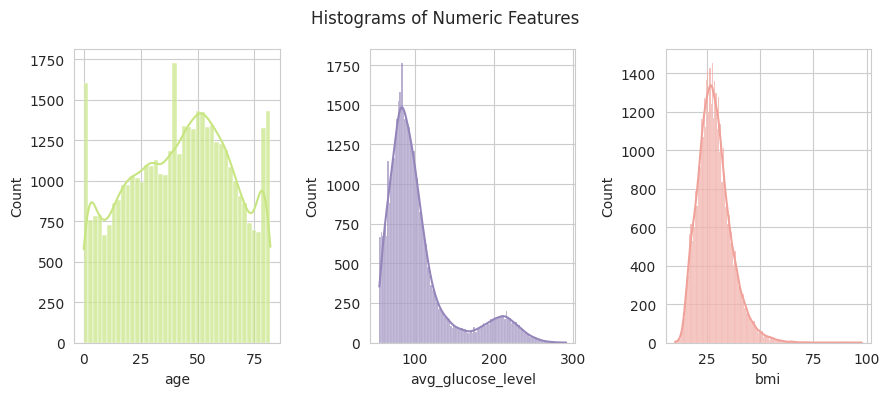

In [ ]:
# distribution plots to check skewness
fig, axes = plt.subplots(1, 3, figsize=(no_of_cols * 3, 4 * no_of_rows))
plt.suptitle('Histograms of Numeric Features')

for col in range(len(numeric_features)):
    sns.histplot(df[numeric_features[col]],
                 kde=True,
                 ax=axes[col],
                 color=colors[col],
                 alpha=0.7)

plt.tight_layout()

Observations: Many of our observations made form the boxlplot are reasserted here.
</br>
<ul>
<li>Age is symmetric and therfore has no outliers</li>
<li>The average glucose level feature displays positive skewness. T</li>
<li>The bmi predictor exhibits a distribution that is close to normal, featuring numerous outliers to the left, but less than average glucose level because there are no more curves after the main.</li>
</ul>


### Categorical Variables

In [ ]:
# description for categorical features
df[categorical_features].astype('object').describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,43400,43400,30108
unique,3,2,2,2,5,2,3
top,Female,0,0,Yes,Private,Urban,never smoked
freq,25665,39339,41338,27938,24834,21756,16053


Key Observations:
- Hypertension, heart_disease, ever_married, and residence_type are all Binary variables.
- With the exception of residence_type, all binary variables indicate whether the predictor is present or not.

In [ ]:
# check unique values
for feature in categorical_features:
  print(feature + ": ", df[feature].unique())

gender:  ['Male' 'Female' 'Other']
hypertension:  [0 1]
heart_disease:  [0 1]
ever_married:  ['No' 'Yes']
work_type:  ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type:  ['Rural' 'Urban']
smoking_status:  [nan 'never smoked' 'formerly smoked' 'smokes']


In [ ]:
binary_features

['hypertension', 'heart_disease', 'ever_married', 'Residence_type']

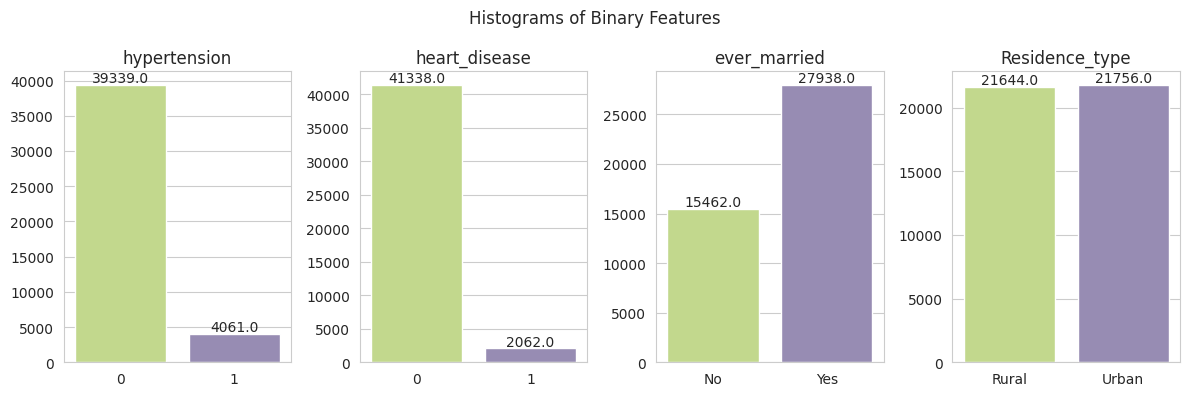

In [ ]:
# histogram plot for binary features
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
plt.suptitle('Histograms of Binary Features')

random_colors = np.random.choice(colors, 2, replace=False)

for i in range(len(binary_features)):
  random_colors = np.random.choice(colors, 2, replace=False)
  sns.countplot(x=binary_features[i], data=df, ax=axes[i], palette=colors[:2])
  axes[i].set_xlabel(""); axes[i].set_ylabel("")
  axes[i].set_title(binary_features[i])
  # axes[i].tick_params(axis='x', labelrotation=35)
  for p in axes[i].patches:
      axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()


Observations:
- Hypertension and heart_disease are asymetric binary variables since more than 90% of the values are 0.  

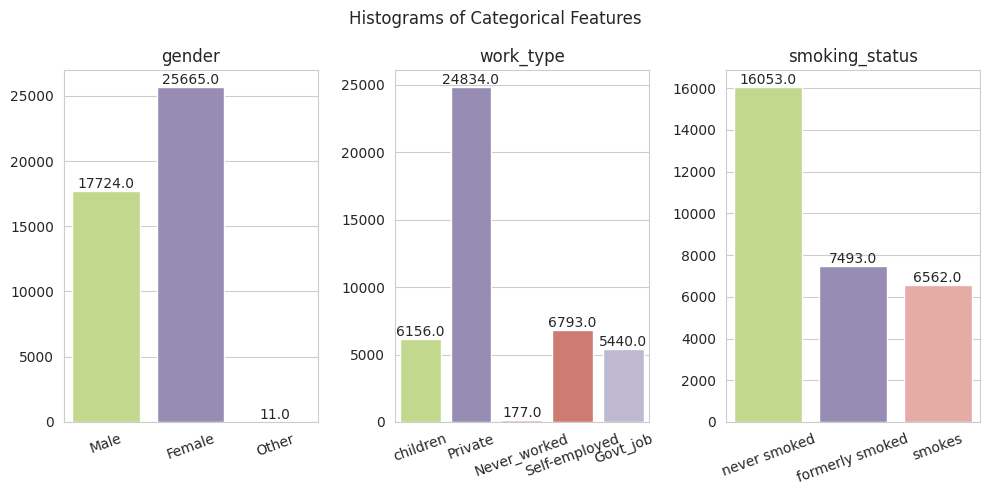

In [ ]:
# Histogram plots for categorical features
cat_features = ["gender", "work_type", "smoking_status"]
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plt.suptitle('Histograms of Categorical Features')

for i in range(len(cat_features)):
  sns.countplot(x=cat_features[i], data=df, ax=axes[i], palette=colors)
  axes[i].set_xlabel(""); axes[i].set_ylabel("")
  axes[i].set_title(cat_features[i])
  axes[i].tick_params(axis='x', labelrotation=20)
  for p in axes[i].patches:
      axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

Observations:
<ul>
<li><strong>Gender: </strong>Other category in gender is very small and fails to provide and important information and therfore should be removed.</li>
<li><strong>Work Type: </strong>Majority of the people work in private sectors while very few have remain unemployed their entire life</li>
<li><strong>Smoking status: </strong>Majority of the people are non smokers.</li>
</ul>


### Target Variable
Stroke is the target variable. It is binary and indicates whether a person has suffered through a stroke or not.

In [ ]:
# description for categorical features
target='stroke'
df[target].astype('object').describe()

count     43400
unique        2
top           0
freq      42617
Name: stroke, dtype: int64

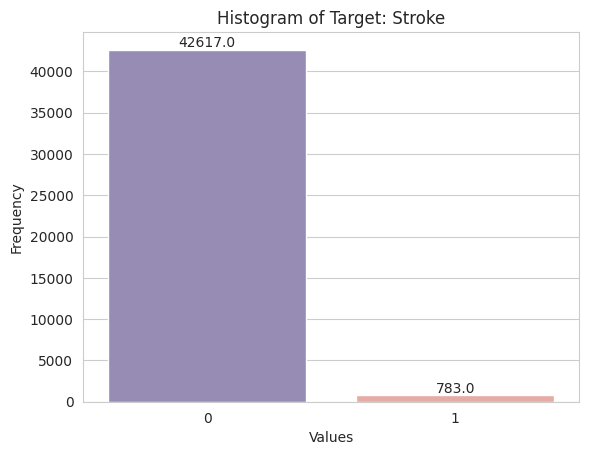

In [ ]:
# histogram plot for targte feature
ax = sns.countplot(x=df[target],
              palette=colors[1:3])

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Target: Stroke')
for p in ax.patches:
  ax.annotate(f"{p.get_height()}",
              xy=(p.get_x()+p.get_width()/2, p.get_height()),
               ha='center', va='center',
              xytext=(0, 5), textcoords='offset points')


Observation: The data exhibits a noticeable imbalance, as evident from the description and histogram. If not handled properly, it can lead to poor predictive performance. Strategies such as choosing suitable evaluation metrics, employing random sampling, and applying techniques like Synthetic Minority Oversampling Technique (SMOTE) can be utilized to handle imbalanced data, particularly in classification problems.







## 2. Bivariate Analysis
---
In this section, the correlation between predictors and target will be explored and correlation among the predictors.

---


###Numeric feaures

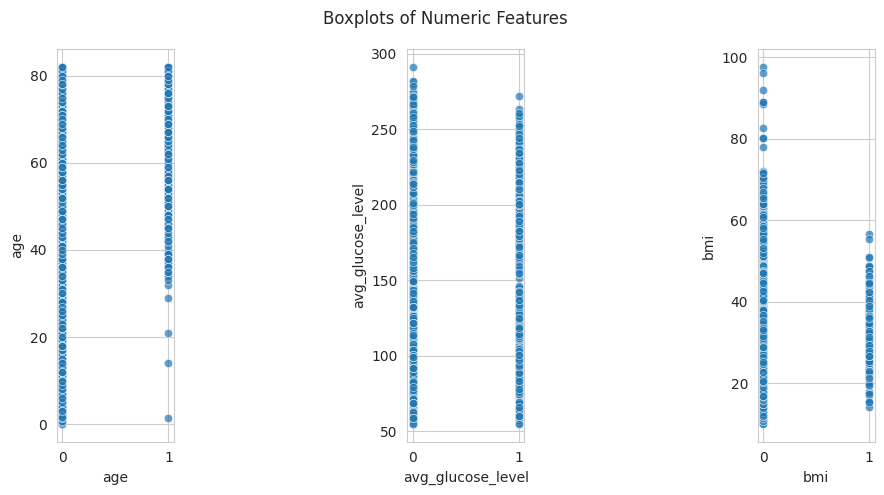

In [ ]:
no_of_cols = 3
no_of_rows = math.ceil(len(numeric_features) / no_of_cols)

fig, axes = plt.subplots(no_of_rows,
                         no_of_cols,
                         figsize=(3*no_of_cols, 5*no_of_rows))
plt.suptitle('Boxplots of Numeric Features')

for i, col in enumerate(numeric_features):
  sns.set_style('whitegrid')
  sns.scatterplot(data=df, x=target, y=col, alpha=0.7, ax=axes[i])
  axes[i].set_xlabel(col)
  plt.tight_layout()

plt.subplots_adjust(wspace=2)

Diffcult to get anything insightful from this. Lets categorize the numeric features.

**BMI**
<ul>
<li>Underweight = <18.5</li>
<li>Normal weight = 18.5–24.9</li>
<li>Overweight = 25–29.9</li>
<li>Obesity = BMI of 30 or greater</li>
</ul>

**Average Blood Glucose**
<ul>
  <li>Low: 0 to 70</li>
  <li>Normal: 70 to 110</li>
  <li>High: 110 to 140</li>
  <li>Very High: 140 and above</li>
</ul>


In [ ]:
# Categorize Age
bins = [-float('inf'),2,12,19,30,50,60,float('inf')]
labels = ['infant','child','teenage','young_adult','middle_aged','senior','aged']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)



# Categorize BMI
bins = [-float('inf'), 18.5, 24.9, 29.9, float('inf')]
labels = ['underweight', 'normal', 'overweight', 'obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


bins = [0, 70, 110, 140, float('inf')]
labels = ['Low', 'Normal', 'High', 'Very High']
df['avg_glc_category'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

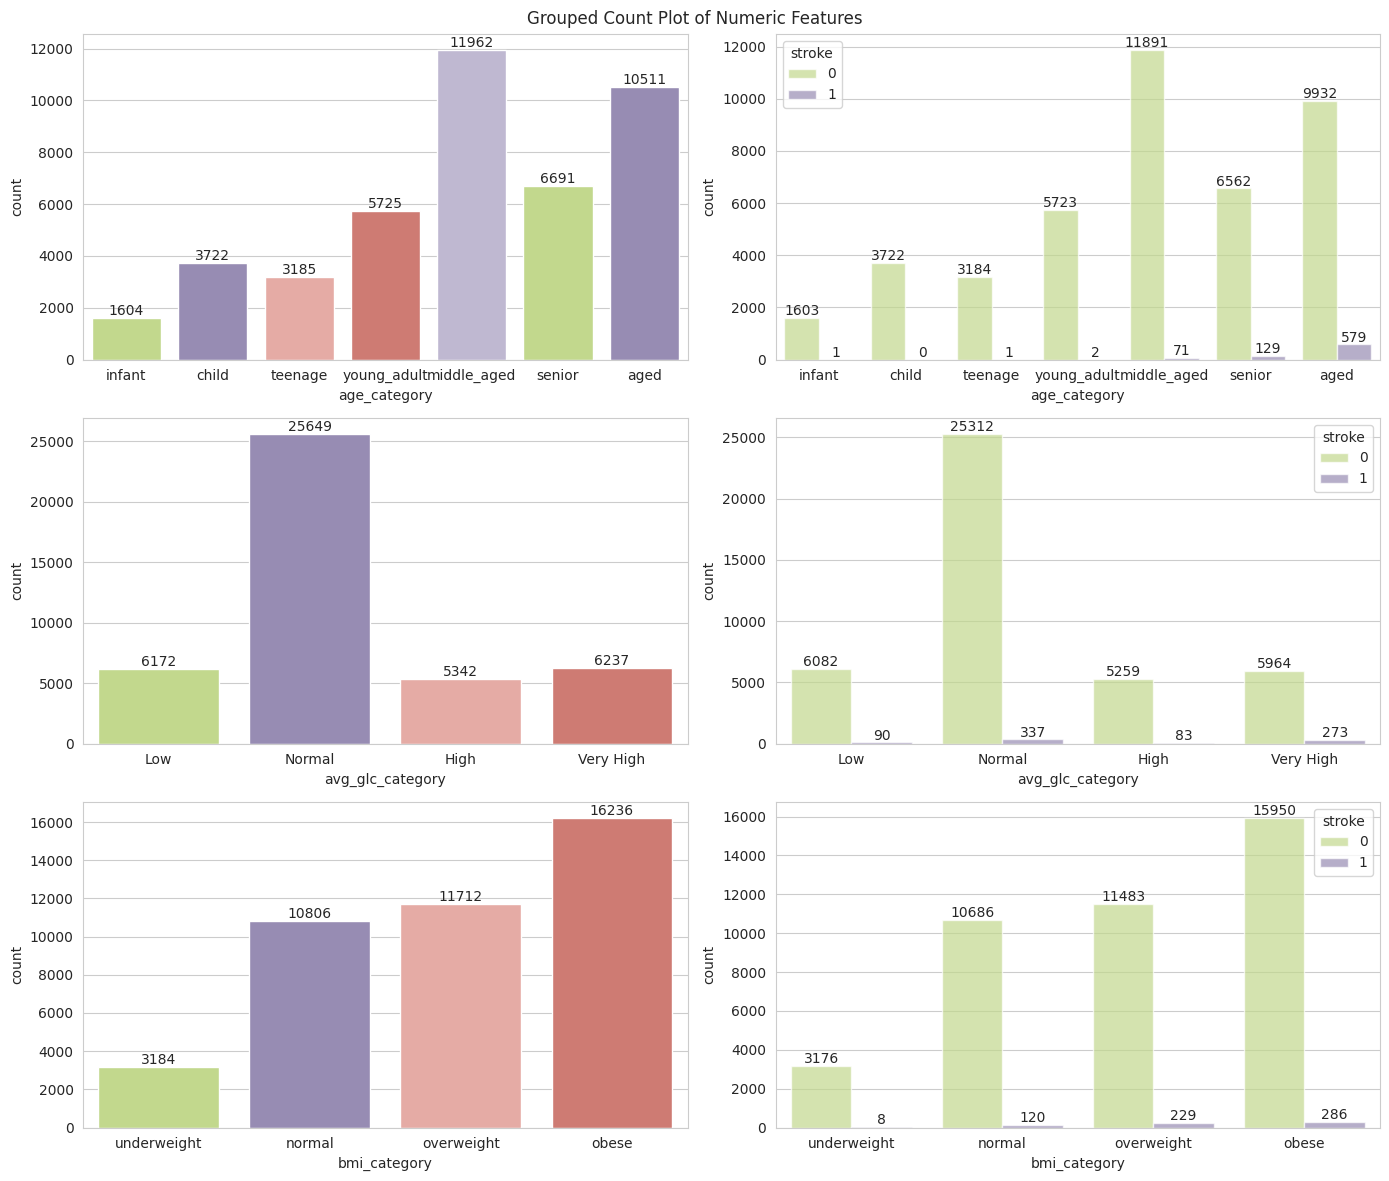

In [ ]:
no_of_rows = 3
no_of_cols = 2
f = ['age_category','avg_glc_category','bmi_category']
fig, axes = plt.subplots(no_of_rows , no_of_cols, figsize=(14,12))
plt.suptitle('Grouped Count Plot of Numeric Features')

for i, col in enumerate(f):
  sns.set_style('whitegrid')
  sns.countplot(data=df, x=col ,palette=colors, ax=axes[i][0])
  sns.countplot(data=df, x=col, hue=target, palette=colors, alpha=0.7, ax=axes[i][1])
  plt.tight_layout()
  # annotation
  for p in axes[i][0].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i][0].annotate(f'{int(height)}',
                            (x + width/2, y + height),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Annotation for the second column (with hue)
  for p in axes[i][1].patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      axes[i][1].annotate(f'{int(height)}',
                          (x + width/2, y + height),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# plt.subplots_adjust(wspace=2)
plt.show()

Observations:
*   <strong>Age: </strong>

1.   Most of the people are <u>middle aged</u>, followed by <u>aged, senior, young adult, child, teenager, infant</u>
2.   <u>Aged</u> people suffering the most, followed by <u>senior and middle aged.</u>
This make sense.
</br>
*   <strong>Average Glucose: </strong>


1.   Most of the people have <u>normal</u> glucose levels, followed by <u>very high, low, high</u>
2.   <u>Normal</u> level people suffered the most, followed by <u>very high, low and high</u>
</br>The stroke levels are proportional to number of people in that category. This needs to be observed later.
</br>
*   <strong>BMI</strong>:


1.   Most of th people are are <u>obese, overweight, normal, underweight</u>
2.   <u>Obese</u> people suffered the most from stroke, followed by <u>overweight, normal and  underweight</u>
</br>While this makes sense, these values are also proportional to number of people in that category. This needs to be observed later.

In [ ]:
age_g = df.groupby(['age_category',target]).size().unstack().fillna(0)
age_g['stroke_ratio'] = (age_g[1]/(age_g[0]+age_g[1])) * 100
age_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
age_category,,,
aged,9932,579,5.508515
senior,6562,129,1.927963
middle_aged,11891,71,0.593546
infant,1603,1,0.062344
young_adult,5723,2,0.034934
teenage,3184,1,0.031397
child,3722,0,0.000000


In [ ]:
glc_g = df.groupby(['avg_glc_category',target]).size().unstack()
glc_g['stroke_ratio'] = (glc_g[1]/(glc_g[0]+glc_g[1])) * 100
glc_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
avg_glc_category,,,
Very High,5964,273,4.377104
High,5259,83,1.553725
Low,6082,90,1.458198
Normal,25312,337,1.313891


In [ ]:
bmi_g = df.groupby(['bmi_category',target]).size().unstack()
bmi_g['stroke_ratio'] = (bmi_g[1]/(bmi_g[0]+bmi_g[1])) * 100
bmi_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
bmi_category,,,
overweight,11483,229,1.955260
obese,15950,286,1.761518
normal,10686,120,1.110494
underweight,3176,8,0.251256


####Correlation

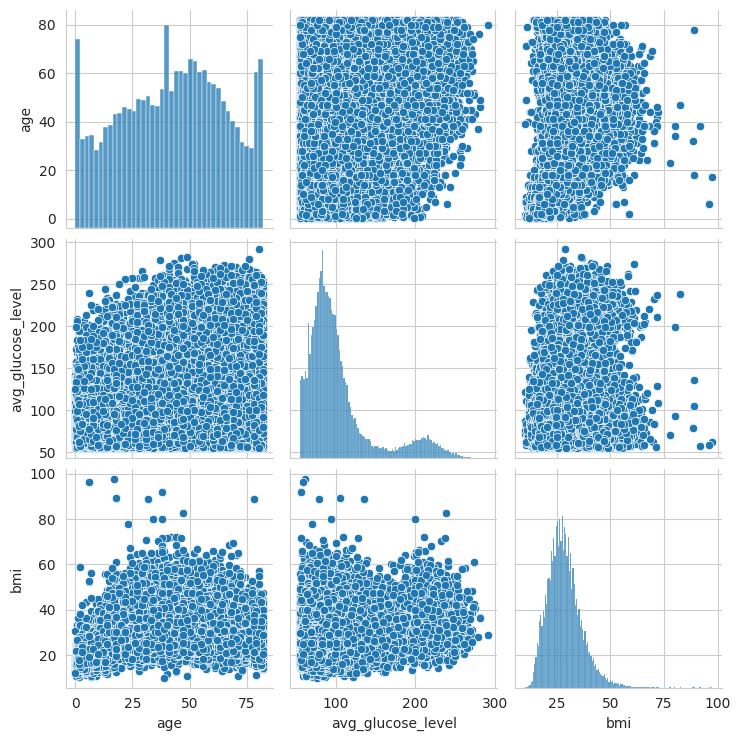

In [ ]:
sns.pairplot(df[numeric_features])
plt.show()

Pearson Correlation Coefficients:
                        age  avg_glucose_level       bmi
age                1.000000           0.237627  0.358897
avg_glucose_level  0.237627           1.000000  0.191295
bmi                0.358897           0.191295  1.000000


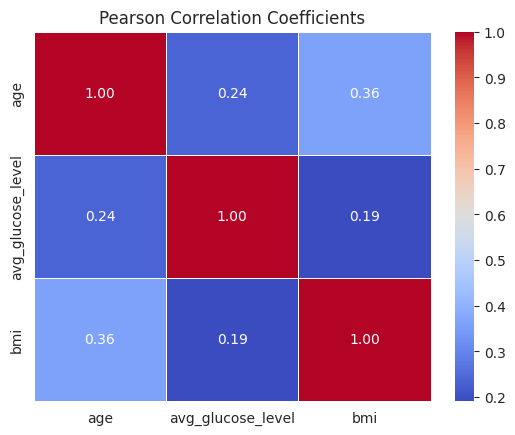

In [ ]:
correlation_matrix = df[numeric_features].corr()

# Display the correlation matrix
print("Pearson Correlation Coefficients:")
print(correlation_matrix)

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Coefficients')
plt.show()

<strong>Observations:</strong>
None of the numeric features are correlate to each other, hence they are independent

###Binary Features

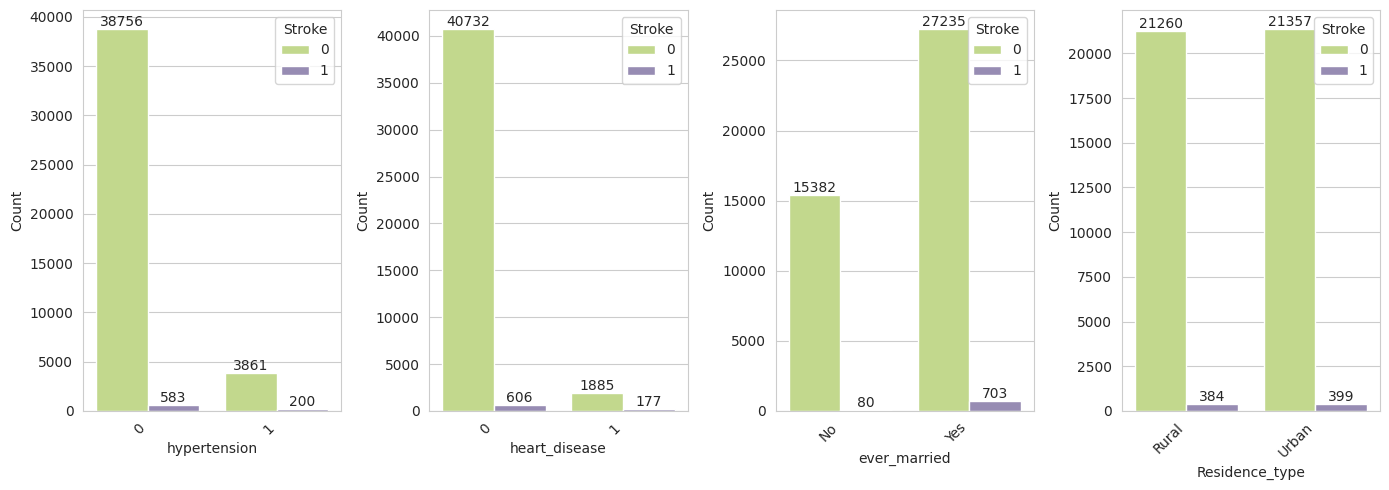

In [ ]:
# Create a new figure with subplots
columns_display =  ["hypertension", "heart_disease", "ever_married", "Residence_type"]
f, ax = plt.subplots(1, len(columns_display), figsize=(14, 5))

# Loop through the columns and create bar plots
for i, column_name in enumerate(columns_display):
    # Create a bar plot using Seaborn
    sns.countplot(x=column_name, hue='stroke', data=df, ax=ax[i], palette=colors, saturation=0.75)

    # Set labels and titles
    # ax[i].set_title(column_name)
    ax[i].set_ylabel("Count")
    ax[i].legend(title='Stroke', loc='upper right')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

    for p in ax[i].patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      ax[i].annotate(f'{int(height)}',
                (x + width/2, y + height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
marr_g = df.groupby(['ever_married',target]).size().unstack()
marr_g['stroke_ratio'] = (marr_g[1]/(marr_g[0]+marr_g[1])) * 100
marr_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
ever_married,,,
Yes,27235,703,2.516286
No,15382,80,0.517397


In [ ]:
res_g = df.groupby(['Residence_type',target]).size().unstack()
res_g['stroke_ratio'] = (res_g[1]/(res_g[0]+res_g[1])) * 100
res_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
Residence_type,,,
Urban,21357,399,1.833977
Rural,21260,384,1.774164


Observations:
*   <strong>Hypertension: </strong> Number of patients that had stroke in the category are proportional to number of people in the category, this needs to be checked.
</br>
*   <strong>Heart_disease: </strong> Number of patients that had stroke in the category are proportional to number of people in the category, this needs to be checked.
*   <strong>Marriage Status: </strong> People who were married suffered more from stroke, this could possible be the stress that comes from living with someone else.
*   <strong>Residential area: </strong> Both Rural and Urban Area poeple had similar chance of getting the stroke.

In [ ]:
hypertension_g = df.groupby(['hypertension',target]).size().unstack()
hypertension_g['stroke_ratio'] = (hypertension_g[1]/(hypertension_g[0]+hypertension_g[1])) * 100
hypertension_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
hypertension,,,
1,3861,200,4.924895
0,38756,583,1.481990


In [ ]:
4.92/1.48

3.324324324324324

Conclusion: People who have hypertension are 3 times more susceptible to stroke than those who dont.

In [ ]:
heartdisease_g = df.groupby(['heart_disease',target]).size().unstack()
heartdisease_g['stroke_ratio'] = (heartdisease_g[1]/(heartdisease_g[0]+heartdisease_g[1])) * 100
heartdisease_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
heart_disease,,,
1,1885,177,8.583899
0,40732,606,1.465964


In [ ]:
8.58/1.46

5.876712328767123

Conclusion: People who have heart disease are 6 times more susceptible to stroke than those who dont.

###Categorical Features

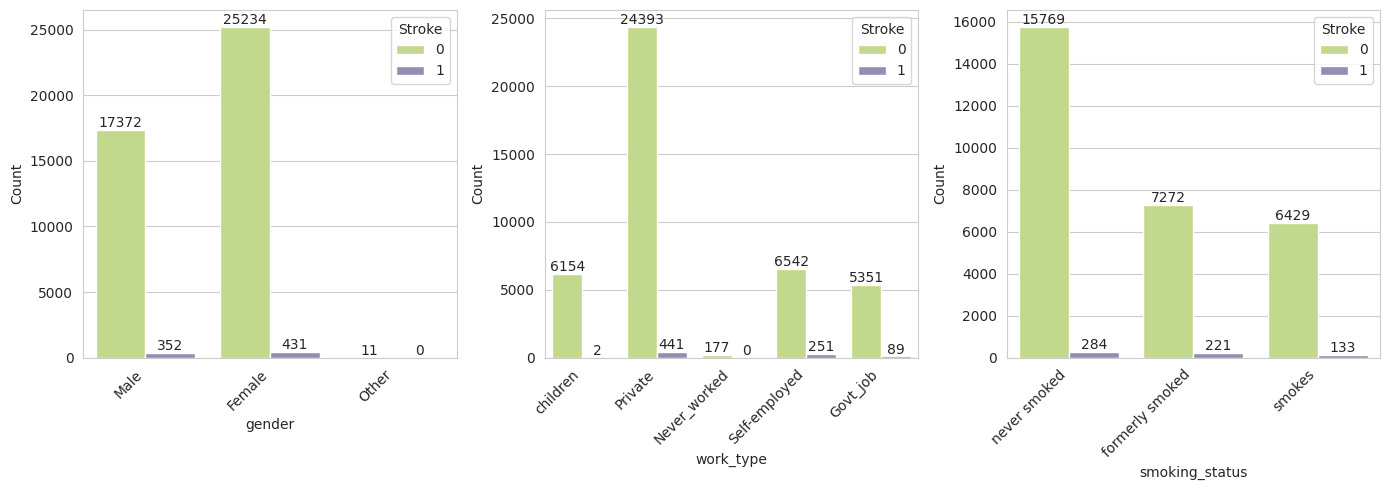

In [ ]:
# Create a new figure with subplots
f, ax = plt.subplots(1, 3, figsize=(14, 5))
columns_display = ['gender', 'work_type', 'smoking_status']

# Loop through the columns and create bar plots
for i, column_name in enumerate(columns_display):
    # Create a bar plot using Seaborn
    sns.countplot(x=column_name, hue='stroke', data=df, ax=ax[i], palette=colors, saturation=0.75)

    # Set labels and titles
    # ax[i].set_title(column_name)
    ax[i].set_ylabel("Count")
    ax[i].legend(title='Stroke', loc='upper right')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

    for p in ax[i].patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      ax[i].annotate(f'{int(height)}',
                (x + width/2, y + height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
gender_g = df.groupby(['gender',target]).size().unstack().fillna(0)
gender_g['stroke_ratio'] = (gender_g[1]/(gender_g[0]+gender_g[1])) * 100
gender_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
gender,,,
Male,17372.0,352.0,1.986008
Female,25234.0,431.0,1.679330
Other,11.0,0.0,0.000000


In [ ]:
work_g = df.groupby(['work_type',target]).size().unstack().fillna(0)
work_g['stroke_ratio'] = (work_g[1]/(work_g[0]+work_g[1])) * 100
work_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
work_type,,,
Self-employed,6542.0,251.0,3.694980
Private,24393.0,441.0,1.775791
Govt_job,5351.0,89.0,1.636029
children,6154.0,2.0,0.032489
Never_worked,177.0,0.0,0.000000


In [ ]:
smoking_g = df.groupby(['smoking_status',target]).size().unstack()
smoking_g['stroke_ratio'] = (smoking_g[1]/(smoking_g[0]+smoking_g[1])) * 100
smoking_g.sort_values(by='stroke_ratio', ascending=False)

stroke,0,1,stroke_ratio
smoking_status,,,
formerly smoked,7272,221,2.949419
smokes,6429,133,2.026821
never smoked,15769,284,1.769140



Observations:
*   <strong>Gender: </strong>Men are more susceptible to stroke compared to women. Rows with gender=Other will be dropped because there are few number of samples, insightful and dont have stroke=1  
*   <strong>Work: </strong> Self Employed people most susceptible to stroke, followed by private, goverment, house spouse and unemployed
*   <strong>Smoking: </strong> People who previously smoked are more suscpetible to stroke, followed by who are still smoking, never smoked. This is not reliable since this column has many missing data.

In [ ]:
from scipy.stats import chi2_contingency

highly_correlated = []
for i in categorical_features:
  for j in categorical_features:
    if i!=j:
      print(i, j)
      contingency_table = pd.crosstab(df[i], df[j])
      chi2, p, _, _ = chi2_contingency(contingency_table)

      print(f"Chi-square statistic: {chi2}\n")
      # print(f"P-value: {p}\n")


gender hypertension
Chi-square statistic: 26.143250239672206

gender heart_disease
Chi-square statistic: 294.88681801310025

gender ever_married
Chi-square statistic: 43.60841214601792

gender work_type
Chi-square statistic: 355.8601038516332

gender Residence_type
Chi-square statistic: 0.2054018316950007

gender smoking_status
Chi-square statistic: 346.3396181819397

hypertension gender
Chi-square statistic: 26.143250239672206

hypertension heart_disease
Chi-square statistic: 620.707831164226

hypertension ever_married
Chi-square statistic: 1351.8842845504691

hypertension work_type
Chi-square statistic: 1031.3232827979045

hypertension Residence_type
Chi-square statistic: 0.40225962380918995

hypertension smoking_status
Chi-square statistic: 47.801717480546266

heart_disease gender
Chi-square statistic: 294.8868180131003

heart_disease hypertension
Chi-square statistic: 620.707831164226

heart_disease ever_married
Chi-square statistic: 719.0888635583842

heart_disease work_type
Chi-s

In [ ]:
df = df.drop(['age_category','avg_glc_category','bmi_category'],axis=1)

##Preprocessing
---

***Orginial shape: (43400, 12)***

###Dropping the useless rows and columns

**Rows**

1.    gender=other

**Columns**

1. id

In [ ]:
# rows
df=df[df.gender!='Other']
# columns
df=df.drop(['id'],axis=1)

print("Shape after dropping useless rows and columns: ",df.shape)

Shape after dropping useless rows and columns:  (43389, 11)


###Checking Missing values


In [ ]:
bmi_null = df[df.bmi.isnull()]
print("Rows with BMI=NULL")
print(bmi_null.stroke.value_counts())
print()

smoking_null = df[df.smoking_status.isnull()]
print("Rows with Smoking=NULL")
print(smoking_null.stroke.value_counts())

Rows with BMI=NULL
0    1318
1     140
Name: stroke, dtype: int64

Rows with Smoking=NULL
0    13145
1      145
Name: stroke, dtype: int64



1.   BMI: 1458
2.   Smoking status: 13290


In [ ]:
# drop data points with bmi=null and stroke==0
df1 = df.drop( df[(df['bmi'].isnull()) & (df['stroke'] == 0)].index )
print("Shape After dropping rows with bmi=null and stroke=0: ", df1.shape)

Shape After dropping rows with bmi=null and stroke=0:  (42071, 11)


In [ ]:
print("Rows with BMI=NULL")
print(df1[df1.bmi.isnull()].stroke.value_counts())
print()

print("Rows with Smoking=NULL")
print(df1[df1.smoking_status.isnull()].stroke.value_counts())

print(df1.shape)

Rows with BMI=NULL
1    140
Name: stroke, dtype: int64

Rows with Smoking=NULL
0    12771
1      145
Name: stroke, dtype: int64
(42071, 11)


###Fill BMI null values with median

In [ ]:
df2 = df1
df2['bmi'] = df2['bmi'].fillna(df2['bmi'].median())
# check if all bmi null rows removed
df2.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       12916
stroke                   0
dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

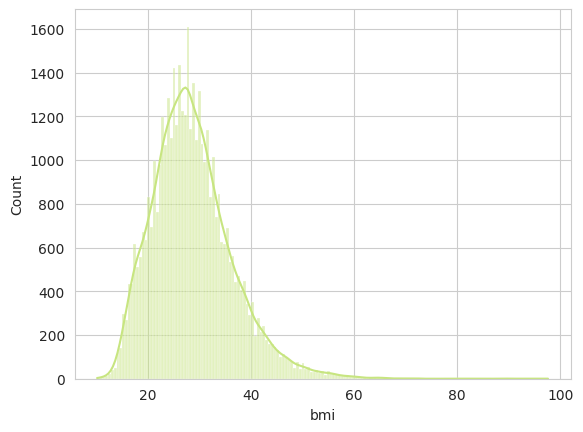

In [ ]:
# create histplot
sns.histplot(data=df2, x='bmi', kde=True, color=colors[0])

###Encoding Categorical Features

In [ ]:
categorical_features = []
binary_features = []
for f in df2.columns:
  if df2[f].dtype!='float':
    unique = df2[f].unique()
    print(f,": ",unique)
    categorical_features.append(f)
    if len(df2[f].unique())==2:
      binary_features.append(f)

print(categorical_features)
print(binary_features)

for f in binary_features:
  print(f,": ",df2[f].unique())

gender :  ['Male' 'Female']
hypertension :  [0 1]
heart_disease :  [0 1]
ever_married :  ['No' 'Yes']
work_type :  ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type :  ['Rural' 'Urban']
smoking_status :  [nan 'never smoked' 'formerly smoked' 'smokes']
stroke :  [0 1]
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']
gender :  ['Male' 'Female']
hypertension :  [0 1]
heart_disease :  [0 1]
ever_married :  ['No' 'Yes']
Residence_type :  ['Rural' 'Urban']
stroke :  [0 1]


In [ ]:
# encode binary features with 0 and 1
df3 = df2.replace({
    "Male":1, "Female":0,
    "No":0, "Yes":1,
    "Rural":0, "Urban":1
})

for f in binary_features:
  print(f,": ",df3[f].unique())

gender :  [1 0]
hypertension :  [0 1]
heart_disease :  [0 1]
ever_married :  [0 1]
Residence_type :  [0 1]
stroke :  [0 1]


In [ ]:
set(categorical_features)-set(binary_features)

{'smoking_status', 'work_type'}

In [ ]:
# label encoding smoking status because it needs to be predicted later
df4 = df3.replace({
    'never smoked':0,
    'formerly smoked':1,
    'smokes':2
})
df4.smoking_status.unique()

array([nan,  0.,  1.,  2.])

In [ ]:
# one hot encoding work_type
df5 = pd.get_dummies(df4, columns=['work_type'])
df5

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,3.0,0,0,0,0,95.12,18.0,NaN,0,0,0,0,0,1
1,1,58.0,1,0,1,1,87.96,39.2,0.0,0,0,0,1,0,0
2,0,8.0,0,0,0,1,110.89,17.6,NaN,0,0,0,1,0,0
3,0,70.0,0,0,1,0,69.04,35.9,1.0,0,0,0,1,0,0
4,1,14.0,0,0,0,0,161.28,19.1,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,1,58.64,20.4,0.0,0,0,0,0,0,1
43396,0,56.0,0,0,1,1,213.61,55.4,1.0,0,1,0,0,0,0
43397,0,82.0,1,0,1,1,91.94,28.9,1.0,0,0,0,1,0,0
43398,1,40.0,0,0,1,1,99.16,33.2,0.0,0,0,0,1,0,0


###Outlier Analysis

In [ ]:
df5.shape

(42071, 15)

In [ ]:
numeric_features

['age', 'avg_glucose_level', 'bmi']

In [ ]:
# get only numerical dataset
num_df5 = df5[numeric_features]

In [ ]:
# identify the interquartile range of each column and then use it to identify outliers of numerical features
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

# Apply the condition to each numerical column
outlier_conditions = num_df5.apply(identify_outliers).any(axis=1)
filtered_rows = df5[outlier_conditions]

In [ ]:
# seeing how mnay of the outliers are stroke==1
# we will only rmeove outliers that are
filtered_rows.stroke.value_counts()

0    5034
1     258
Name: stroke, dtype: int64

In [ ]:
# drop the rows that are outliers and stroke==0
df6 = df5.drop(filtered_rows[filtered_rows.stroke==0].index)
print("Shape after dropping outliers that have stroke==0: ", df6.shape)

Shape after dropping outliers that have stroke==0:  (37037, 15)


###Fill smoking_status null values using Decision Tree

In [ ]:
df6.shape

(37037, 15)

In [ ]:
# training data - has no null values
complete_data = df6.dropna()

# testing data for smoking - null values of smoking_status
incomplete_smoking = df6[df6['smoking_status'].isnull()]

In [ ]:
# make x and y
xtrain_smoking, ytrain_smoking = complete_data.drop(['smoking_status'],axis=1), complete_data['smoking_status']
xtest_smoking = incomplete_smoking.drop(['smoking_status'],axis=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# create model
model = DecisionTreeRegressor()
# train
model.fit(xtrain_smoking, ytrain_smoking)

DecisionTreeRegressor()

In [ ]:
# Predict missing 'smoking_status' values
incomplete_smoking['smoking_status'] = model.predict(xtest_smoking)

<ipython-input-66-804bf4c329ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_smoking['smoking_status'] = model.predict(xtest_smoking)


In [ ]:
incomplete_smoking.smoking_status.value_counts()

0.0    7737
1.0    2630
2.0    1700
Name: smoking_status, dtype: int64

In [ ]:
df7 = pd.concat([complete_data, incomplete_smoking], axis=0)
df7.shape

(37037, 15)

###Normalizing the numerical values

In [ ]:
numeric_features

['age', 'avg_glucose_level', 'bmi']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(df7[numeric_features])

# Update the DataFrame with the standardized values
standardized_data

array([[ 0.80023575, -0.16217155,  1.72429302],
       [ 1.33469836, -0.96604486,  1.23413024],
       [ 0.53300445, -0.6027723 , -1.46919178],
       ...,
       [-1.15946046, -0.39500589, -0.41459912],
       [-1.51576887, -0.60744598, -1.26124393],
       [-0.98130626,  1.70730127, -0.71166748]])

In [ ]:
mean_values = scaler.mean_
std_dev_values = scaler.scale_

print("Mean values:", mean_values)
print("Standard deviation values:", std_dev_values)

Mean values: [40.03273915 91.77687718 27.59127089]
Standard deviation values: [22.45245953 23.53604696  6.7324573 ]


In [ ]:
import joblib
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']

In [ ]:
df8 = df7.copy()
for i,f in enumerate(numeric_features):
  df8[f] = standardized_data[:,i]

In [ ]:
from IPython.display import HTML

html_code = """
<!DOCTYPE html>
<html>
<head>
    <style>
    table {
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        width: 100%;
    }
    td, th {
        border: 1px solid #dddddd;
        text-align: left;
        padding: 8px;
    }
    th {
        background-color: #f2f2f2;
        color: #000000; /* Remove the quotes around the color value */
    }
    </style>
</head>
<body>
    <h2>Operations and Shape Changes</h2>
    <table>
        <tr>
            <th>Operation</th>
            <th>Columns Affected</th>
            <th>Shape After</th>
        </tr>
        <tr>
            <td>Shape before any preprocessing</td>
            <td>None</td>
            <td>(43400, 12)</td>
        </tr>
        <tr>
            <td>Shape after dropping useless rows and columns</td>
            <td>id</td>
            <td>(43389, 11)</td>
        </tr>
        <tr>
            <td>Shape After dropping rows with bmi==null and stroke==0</td>
            <td>bmi</td>
            <td>(42071, 11)</td>
        </tr>
        <tr>
            <td>Fill BMI null values with median</td>
            <td>bmi</td>
            <td>(42071, 11)</td>
        </tr>
        <tr>
            <td>Encoding Categorical Features</td>
            <td>'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'</td>
            <td>(42071, 11)</td>
        </tr>
        <tr>
            <td>Shape after dropping outliers that have stroke==0</td>
            <td>'age', 'avg_glucose_level', 'bmi'</td>
            <td>(37037, 15)</td>
        </tr>
        <tr>
            <td>Fill smoking_status null values using Decision Tree</td>
            <td>smoking_status</td>
            <td>(37037, 15)</td>
        </tr>
        <tr>
            <td>Normalizing the numerical values</td>
            <td>'age', 'avg_glucose_level', 'bmi'</td>
            <td>(37037, 15)</td>
        </tr>
    </table>
</body>
</html>
"""

# Display the HTML code
HTML(html_code)


Operation,Columns Affected,Shape After
Shape before any preprocessing,None,"(43400, 12)"
Shape after dropping useless rows and columns,id,"(43389, 11)"
Shape After dropping rows with bmi==null and stroke==0,bmi,"(42071, 11)"
Fill BMI null values with median,bmi,"(42071, 11)"
Encoding Categorical Features,"'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'","(42071, 11)"
Shape after dropping outliers that have stroke==0,"'age', 'avg_glucose_level', 'bmi'","(37037, 15)"
Fill smoking_status null values using Decision Tree,smoking_status,"(37037, 15)"
Normalizing the numerical values,"'age', 'avg_glucose_level', 'bmi'","(37037, 15)"


## Models
---
In this section, we will utilize appropriate models along with techniques for handling class imbalance to address the classification problem presented by an imbalanced dataset.
<br><br>
**Imbalance Handling Techniques:** The techniques employed encompass Class Reweighing, and SMOTE (Synthetic Minority Oversampling Technique).
<br><br>
**Algorithms:** Specialized algorithms tailored for handling imbalanced datasets, such as Decision Tree Classifier, Random Forest Classifier, Gaussian Naive Bayes, AdaBoost, and XGB Classifier, will be applied, and the optimal one will be selected.
<br><br>
**Evaluation Metric:** Given the dataset's context, correctly predicting 'stroke' holds greater significance than incorrect predictions. Therefore, emphasis will be placed on the Recall value of the model on the test set, followed by precision and F1-scores.

---


### 1. Baseline Models

In [ ]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [ ]:
# x, y and splitting
x = df8.drop(['stroke'],axis=1)
y = df8['stroke']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training Set Shape: {xtrain.shape}")
print(f"Test Set Shape: {xtest.shape}")

Training Set Shape: (29629, 14)
Test Set Shape: (7408, 14)


In [ ]:
# models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=25, random_state=42)
adab = AdaBoostClassifier(n_estimators=25, random_state=42)
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, n_estimators = 50, n_jobs = 8,  random_state = 42)
nb = GaussianNB()

models = [dt, rf, adab, xgb, nb]

In [ ]:
# get baseline model performance without applying imbalance techniques
base_models = []
base_comparison_report = {'Model Name':[], 'Accuracy':[], 'Recall (class=0)': [], 'Recall (class=1)': [],
                     'Precision (class=0)': [], 'Precision (class=1)': [], 'F1-score (class=0)': [],
                     'F1-score (class=1)': [], 'Confusion Matrix':[]}

for model in models:
  base_comparison_report['Model Name'].append(str(model).split("(")[0])

  model.fit(xtrain, ytrain)
  base_models.append(model)
  ypred = model.predict(xtest)

  # accuracy
  base_comparison_report['Accuracy'].append(accuracy_score(ytest, ypred))

  # classification report
  report = classification_report(ytest, ypred, output_dict=True)
  base_comparison_report['Recall (class=0)'].append(report['0']['recall'])
  base_comparison_report['Recall (class=1)'].append(report['1']['recall'])
  base_comparison_report['Precision (class=0)'].append(report['0']['precision'])
  base_comparison_report['Precision (class=1)'].append(report['1']['precision'])
  base_comparison_report['F1-score (class=0)'].append(report['0']['f1-score'])
  base_comparison_report['F1-score (class=1)'].append(report['1']['f1-score'])

  # confusion matrix
  [[tn,fp],[fn,tp]] = confusion_matrix(ytest, ypred)
  base_comparison_report['Confusion Matrix'].append([tn,fp,fn,tp])

In [ ]:
# function to generate confusion matrix HTML formatted table
def cm_formatter(cell_content):
    # only transform conf. mat. values;gets passed list of [tn,fp,fn,tp]
    # if not, return content as is
    if type(cell_content) != type([1,2,3,4]):
        return cell_content

    tcolor = "#008000"  # Lime color of True values
    fcolor = "#FF0000"  # Red  color of False values

    tn,fp,fn,tp = cell_content
    table = f'''
        <table style="border:1px solid black; font-size:10px">
    	<tr style="border:1px dotted #000;"><td style="border:1px dotted #000;">T1</td><td style="border:1px dotted #000;color:{tcolor};">{tp}</td><td style="border:1px dotted #000;color:{fcolor};">{fn}</td></tr>
    	<tr style="border:1px dotted #000;"><td style="border:1px dotted #000;">T0</td><td style="border:1px dotted #000;color:{fcolor};">{fp}</td><td style="border:1px dotted #000;color:{tcolor};">{tn}</td></tr>
    	<tr style="border:1px dotted #000;"><td style="border:1px dotted #000;">&nbsp;</td><td>P1</td><td style="border:1px dotted #000;">P0</td></tr>
        </table>'''
    return table

# function to add vertical lines in DataFrame
def vertical_line_style(val):
    return 'border-collapse: collapse; border-right: 1px solid lightgrey;'

In [ ]:
# Report creation
base_report_df = pd.DataFrame(base_comparison_report)

# round all values to 3 places of decimal
base_report_df = base_report_df.round(decimals=3)

# embed a confusion matrix in the dataframe and add a caption
base_report_df = base_report_df.style.format(cm_formatter)

# apply the style to the DataFrame
base_report_df.applymap(vertical_line_style)

base_report_df

**Observation:**

For the Random Forest classifier, the model is observed to predominantly predict class 0 for the majority of the test points. Despite this, the accuracy appears deceptively high at 98%. This is also true for the Decision Tree, AdaBoost and XGBoost classifiers. This high accuracy is mainly due to the overwhelming number of instances where the ground truth is also class 0.

**Specific Metrics Analysis:**

- **Recall for Stroke=0:** 100%
  - All instances where the actual stroke occurrence is 0 are correctly predicted by the model.

- **Recall for Stroke=1:** around 33% for all four classifiers mentioned above
  - Only 33% of instances where the actual stroke occurrence is 1 are correctly predicted by the model.

- **Gaussian Naive Bayes:**
 - High recall (98%) for stroke class 1
 - Very low recall (45%) for stroke class 0
 - Overall low accuracy of 44%.

**Interpretation:**

Since it is essential for our use case that occurrences of stroke (class 1) are predicted as accurately as possible, the focus should be on achieving high recall. The current models, while achieving perfect recall for class 0, fall short in predicting instances of stroke (class 1), and improvement in this aspect is crucial for the models' effectiveness in identifying positive cases. For Gaussian Naive Bayes, while it demonstrates high accuracy in predicting instances of stroke (class 1), there is a need to enhance the recall for non-stroke cases (class 0) to ensure the overall effectiveness of the model.


### 2. Handling Imbalances: Class Reweighting
---
Class Reweighing is a technique used to address class imbalance. It involves assigning different weights to different classes during the training process,  giving more importance to the minority class (less frequent) by penalizing its wrong predictions more and less importance to the majority class. For our use case, it will help the model better learn patterns in the stroke class 1 (minority class) and improve overall predictive performance on the cerebral stroke imbalanced dataset.

---

In [ ]:
# assign class 0 weight of 0.05
# assign class 1 weight of 0.95
class_weights = {0:0.05,1:0.95}

In [ ]:
# models
# AdaBoost does not have the option of class reweighting directly so it will be excluded in this section
weighted_dt = DecisionTreeClassifier(class_weight=class_weights)
weighted_rf = RandomForestClassifier(n_estimators=25, random_state=42,
                                     class_weight ={0: 1, 1: 50}) # assign class 0 weight of 1, and class 1 weight of 50

weighted_xgb = XGBClassifier(objective = 'binary:logistic',
                             random_state = 42,
                             learning_rate = 0.1,
                             n_estimators = 25, class_weight=class_weights)

weighted_nb = GaussianNB(priors=list(class_weights.values()))

weighted_models = [weighted_dt, weighted_rf, weighted_xgb, weighted_nb]

In [ ]:
# get baseline model performance without applying imbalance techniques
trained_weighted_models = []
weight_comparison_report = {'Model Name':[], 'Accuracy':[], 'Recall (class=0)': [], 'Recall (class=1)': [],
                     'Precision (class=0)': [], 'Precision (class=1)': [], 'F1-score (class=0)': [],
                     'F1-score (class=1)': [], 'Confusion Matrix':[]}

for model in weighted_models:
  weight_comparison_report['Model Name'].append(str(model).split("(")[0])

  model.fit(xtrain, ytrain)
  trained_weighted_models.append(model)
  ypred = model.predict(xtest)

  # accuracy
  weight_comparison_report['Accuracy'].append(accuracy_score(ytest, ypred))

  # classification report
  report = classification_report(ytest, ypred, output_dict=True)
  weight_comparison_report['Recall (class=0)'].append(report['0']['recall'])
  weight_comparison_report['Recall (class=1)'].append(report['1']['recall'])
  weight_comparison_report['Precision (class=0)'].append(report['0']['precision'])
  weight_comparison_report['Precision (class=1)'].append(report['1']['precision'])
  weight_comparison_report['F1-score (class=0)'].append(report['0']['f1-score'])
  weight_comparison_report['F1-score (class=1)'].append(report['1']['f1-score'])

  # confusion matrix
  [[tn,fp],[fn,tp]] = confusion_matrix(ytest, ypred)
  weight_comparison_report['Confusion Matrix'].append([tn,fp,fn,tp])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:35:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Report creation
weight_report_df = pd.DataFrame(weight_comparison_report)
weight_report_df = weight_report_df.round(decimals=3)

weight_report_df = weight_report_df.style.format(cm_formatter)

weight_report_df.applymap(vertical_line_style)

weight_report_df

**Observation:**

Accuracy ranges from 0.2678 to 0.9853, indicating significant variability in performance across models. Recall for stroke (class 0) is consistently high across all models, indicating a low false positive rate for predicting non-strokes.
Recall for stroke (class 1) varies significantly, being extremely low in Gaussian NB and relatively high in Random Forest Classifier.

**Specific Metrics Analysis:**

- **Recall for Stroke=0:** 100%
  - Highest in Random Forest Classifier (0.9997).
  - Lowest in Gaussian NB (0.2514).

- **Recall for Stroke=1:**
  - Highest in Gaussian NB (1.0).
  - Lowest in XGB Classifier (0.3272).

**Interpretation:**

The Decision Tree Classifier and Random Forest Classifier show high accuracy, but their recall for stroke (class 1) is relatively low. These models might struggle to identify instances of the minority class.

The XGB Classifier has high accuracy and perfect recall for stroke (class 0) but lower recall for stroke (class 1). This suggests it is better at identifying non-stroke instances but may miss some stroke cases.

Gaussian NB has a very low accuracy and recall for stroke (class 0) but perfect recall for stroke (class 1). This model tends to classify everything as a stroke, resulting in low precision.

Hence, we observe limited enhancement in our model metrics through class reweighing. To enhance these outcomes, we will employ an upsampling technique in the subsequent section.

### 3. Handling Imbalances: SMOTE
---
SMOTE or Synthetic Minority Oversampling Technique is a method for addressing class imbalance in machine learning. It generates synthetic samples for the minority class to balance dataset representation. This technique involves creating synthetic instances through interpolation, improving the model's performance on the minority class and overall generalization.

---

In [ ]:
smote = SMOTE(random_state=42)

# Fit and transform the dataset
xresampled, yresampled = smote.fit_resample(x, y)

# Check the shape of the resampled dataset
print("Original dataset shape:", x.shape, y.shape)
print("Resampled dataset shape:", xresampled.shape, yresampled.shape)

Original dataset shape: (37037, 14) (37037,)
Resampled dataset shape: (72508, 14) (72508,)


Previously, the class distribution was imbalanced:
- Class 0 (No Stroke): 36,254 instances
- Class 1 (Stroke): 783 instances

Given the significant class imbalance, we plan to address this issue using SMOTE to synthetically generate additional instances of the minority class (Stroke = 1). This approach aims to improve the model's ability to generalize and make accurate predictions for the minority class, which is crucial in the context of stroke prediction.

In [ ]:
# split resampled data
xtrain_resampled, xtest_resampled, ytrain_resampled, ytest_resampled = train_test_split(xresampled, yresampled, test_size=0.2, random_state=42)
print(f"Training Set Shape: {xtrain_resampled.shape}")
print(f"Test Set Shape: {xtest_resampled.shape}")

Training Set Shape: (58006, 14)
Test Set Shape: (14502, 14)


In [ ]:
# get model performance with dataset upsampled using SMOTE technique
smote_models = []
smote_comparison_report = {'Model Name':[], 'Accuracy':[], 'Recall (class=0)': [], 'Recall (class=1)': [],
                     'Precision (class=0)': [], 'Precision (class=1)': [], 'F1-score (class=0)': [],
                     'F1-score (class=1)': [], 'Confusion Matrix':[]}

for model in models:
  smote_comparison_report['Model Name'].append(str(model).split("(")[0])

  model.fit(xtrain_resampled, ytrain_resampled)
  smote_models.append(model)
  ypred = model.predict(xtest_resampled)

  # accuracy
  smote_comparison_report['Accuracy'].append(accuracy_score(ytest_resampled, ypred))

  # classification report
  report = classification_report(ytest_resampled, ypred, output_dict=True)
  smote_comparison_report['Recall (class=0)'].append(report['0']['recall'])
  smote_comparison_report['Recall (class=1)'].append(report['1']['recall'])
  smote_comparison_report['Precision (class=0)'].append(report['0']['precision'])
  smote_comparison_report['Precision (class=1)'].append(report['1']['precision'])
  smote_comparison_report['F1-score (class=0)'].append(report['0']['f1-score'])
  smote_comparison_report['F1-score (class=1)'].append(report['1']['f1-score'])

  # confusion matrix
  [[tn,fp],[fn,tp]] = confusion_matrix(ytest_resampled, ypred)
  smote_comparison_report['Confusion Matrix'].append([tn,fp,fn,tp])

In [ ]:
# Report creation
smote_report_df = pd.DataFrame(smote_comparison_report)

smote_report_df = smote_report_df.round(decimals=3)
smote_report_df = smote_report_df.style.format(cm_formatter)
smote_report_df.applymap(vertical_line_style)

smote_report_df

**Observation:**

Accuracy ranges from 0.2678 to 0.9853, indicating significant variability in performance across models. Recall for stroke (class 0) is consistently high across all models, indicating a low false positive rate for predicting non-strokes.
Recall for stroke (class 1) varies significantly, being extremely low in GaussianNB and relatively high in RandomForestClassifier.

**Specific Metrics Analysis:**

- **Recall for Stroke=0:** 100%
  - Varies across models but generally shows improvement compared to the previous class reweighing approach.
  - Highest in Random Forest Classifier (0.9632).

- **Recall for Stroke=1:**
  - Demonstrates substantial improvement in all models.
  - Highest in Gaussian NB (0.9953), and next Highest in Random Forest Classifier (0.9823).

**Interpretation:**

SMOTE has significantly improved the recall for stroke (class 1) in all models, addressing the previous limitation observed with class reweighing. The models exhibit improved overall performance metrics, including accuracy, recall, precision, and F1-score, after applying SMOTE. While recall for stroke (class 1) has improved, there might be a trade-off with precision, as seen in AdaBoostClassifier and XGBClassifier. RandomForestClassifier appears to have achieved a good balance between precision and recall for both classes.

## Model Selection
---


We require a model that accurately classifies both classes, with a particular emphasis on the minority class since it is more life-threatening if a patient is diagnosed with a stroke. Therefore, the optimal model, achieving a well-balanced recall for each stroke class, is the **Random Forest Classifier**. We will proceed to fine-tune the hyperparameters of this model to assess if we can enhance the evaluation metrics further.

---

In [ ]:
rf_model = RandomForestClassifier(n_estimators=25, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# parameter grid for random forest classifier
params_grid_rf = {
    'criterion': ['gini', 'entropy'],
    # 'max_depth': [3, 5, 8],
    'n_estimators': [10,20,25,30],
    'max_features': ["log2", "sqrt", None],
    }

# cross fold validation
cv = StratifiedKFold(n_splits=5)

In [ ]:
# get the best performing model
rf_grid_search = GridSearchCV(estimator = rf_model,
                           param_grid = params_grid_rf,
                           scoring='recall',
                           cv = cv,n_jobs=8)

In [ ]:
# train the best model
rf_grid_search.fit(xtrain_resampled, ytrain_resampled)

# display the parameters of the best model
rf_grid_search_best = rf_grid_search.best_estimator_
print(rf_grid_search_best.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# predict
y_preds_rf_grid_search_best = rf_grid_search_best.predict(xtest_resampled)

# evaluate
report = classification_report(ytest_resampled, y_preds_rf_grid_search_best)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7254
           1       0.99      0.98      0.99      7248

    accuracy                           0.99     14502
   macro avg       0.99      0.99      0.99     14502
weighted avg       0.99      0.99      0.99     14502



### Save the model to file for Deployment

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_grid_search_best, 'rf_smote.joblib')

['rf_smote.joblib']

In [ ]:
import pickle
# Save the model to a file
with open('rf_smote.pkl', 'wb') as file:
    pickle.dump(rf_grid_search_best, file)